<a href="https://colab.research.google.com/github/artdol/spanning_trees/blob/main/Spanning_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an illustration of the algorithmic approach to the study of social dynamics. 

A society on a 3x3 grid randomly plays a Stag Hunt game between neighbors. Which of the two actions emerges as a social norm?

The notebook illustrates how the spanning tree approach from evolutionary game theory can be used to answer this question. The notebook computes the stochastically stable state.

Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
# Binary to a binary list
# by Cory Kramer @ https://stackoverflow.com/questions/64391524/python-converting-binary-list-to-decimal
def binatodeci(binary):
    return sum(val*(2**idx) for idx, val in enumerate(reversed(binary)))

Build a graph G of all possible transitions. The weights are the costs of transitions.

In [121]:
G=nx.DiGraph()
G.add_nodes_from(range(2**9))
for state in range(2**9):
  state_bin = np.array([int(i) for i in list('{0:09b}'.format(state))]).reshape(3,3)
  for x in range(3):
    for y in range(3):
      new_state_bin = np.copy(state_bin)
      new_state_bin[x,y]=1-new_state_bin[x,y]
      new_state=binatodeci(new_state_bin.flatten().tolist())

      n = np.sum([state_bin[(x-1) % 3, (y-1) % 3],state_bin[(x+1) % 3, (y-1) % 3],state_bin[(x-1) % 3, (y+1) % 3],state_bin[(x+1) % 3, (y+1) % 3]])
      
      if state_bin[x,y] == 0:
        if n*10 >= 4*4:
          G.add_edge(new_state,state,weight=0)
        else:
          G.add_edge(new_state,state,weight=1)
      else:
        if n*10 <= 4*4:
          G.add_edge(new_state,state,weight=0)
        else:
          G.add_edge(new_state,state,weight=1)

Draw the graph (can take long)

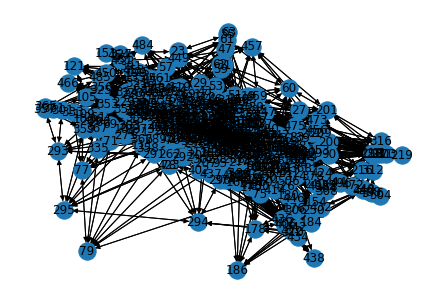

In [100]:
nx.draw(G, with_labels=True)

Find the minimum cost spanning tree and report the root

In [122]:
spanning_tree = nx.minimum_spanning_arborescence(G, attr='weight', default=1)
root_node = [n for n,d in spanning_tree.in_degree() if d==0] 
print(np.array([int(i) for i in list('{0:09b}'.format(root_node[0]))]).reshape(3,3))